# Instructions:
---

1. Choose a data from https://archive.ics.uci.edu
2. Perform regression analysis on your chosen dataset

## Exploring the Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("bike_data.csv")
print(df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

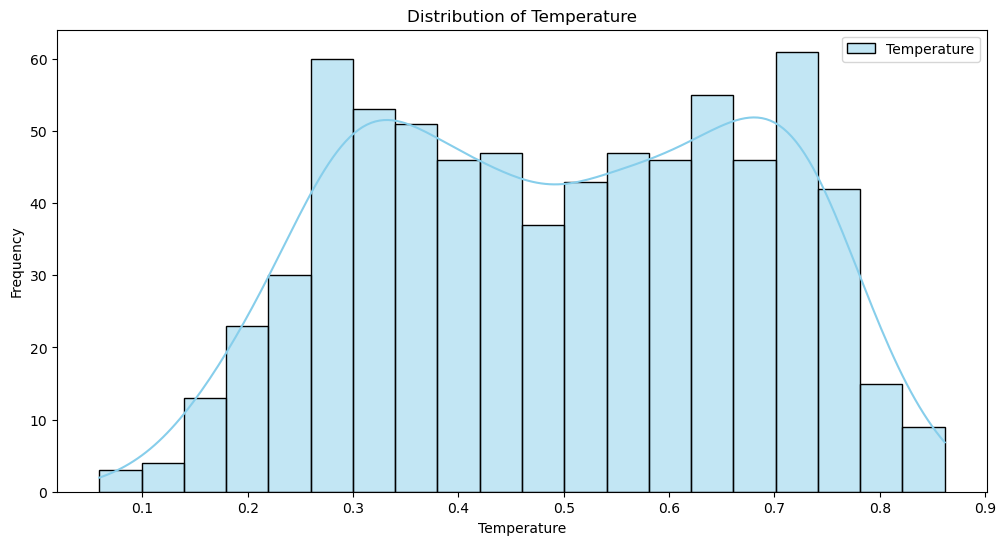

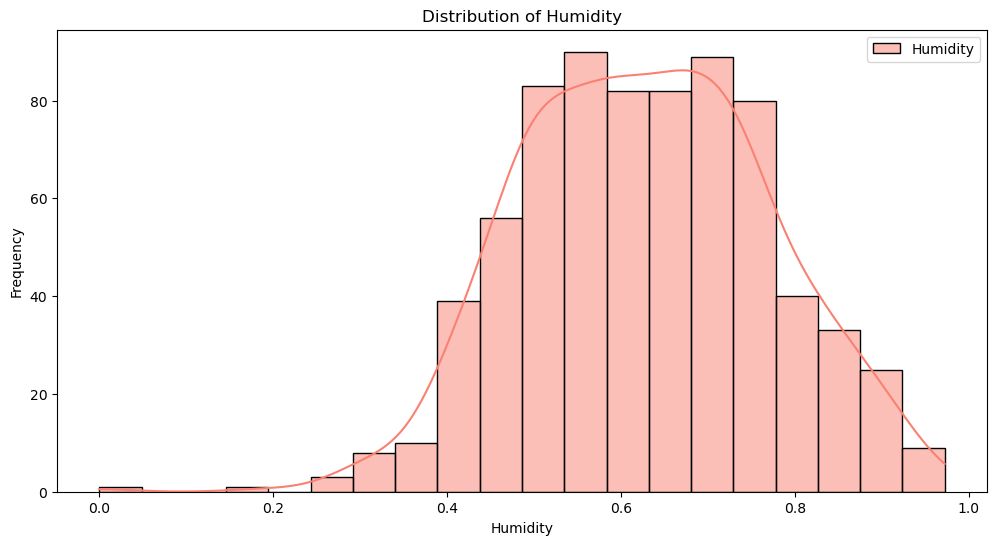

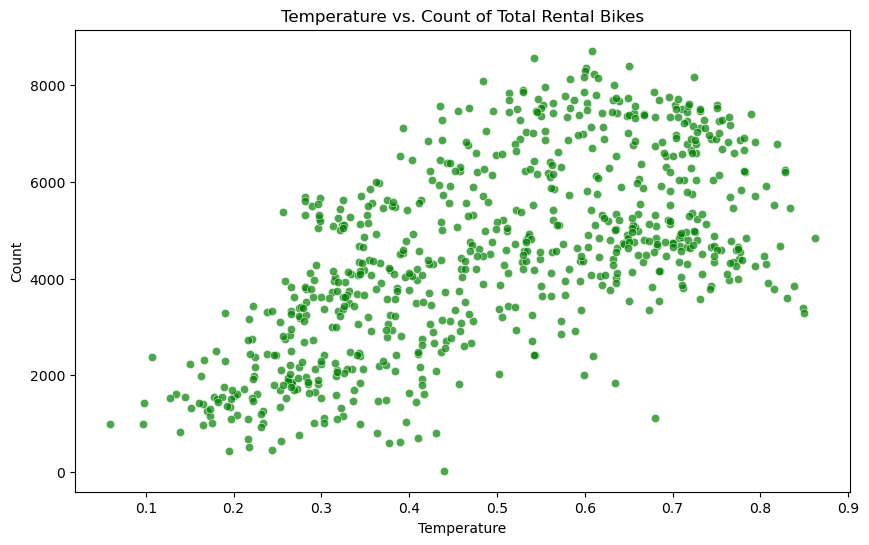

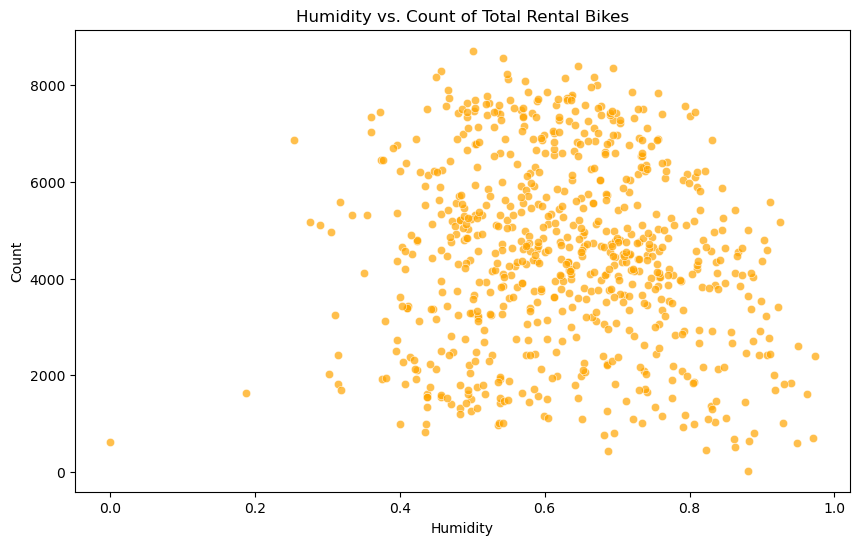

In [2]:
# Check the structure of the DataFrame
print(df.info())

# Summary statistics
print(df.describe())

# Visualizations
# Distribution of numerical variables
plt.figure(figsize=(12, 6))
sns.histplot(df['temp'], bins=20, kde=True, color='skyblue', label='Temperature')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['hum'], bins=20, kde=True, color='salmon', label='Humidity')
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Relationship between variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp', y='cnt', color='green', alpha=0.7)
plt.title('Temperature vs. Count of Total Rental Bikes')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='hum', y='cnt', color='orange', alpha=0.7)
plt.title('Humidity vs. Count of Total Rental Bikes')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()

## Linear Regression

In [3]:
# For simplicity, let's select 'temp' and 'hum' as independent variables and 'cnt' as the dependent variable
X = df[['temp', 'hum']]
y = df['cnt']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 2264193.4886038033
R-squared: 0.4353466447007208
Coefficients: [ 6822.97833757 -2485.35823032]
Intercept: 2717.03203992024


## Feature Engineering

In [5]:
# Extract additional features from 'dteday'
df['year'] = pd.to_datetime(df['dteday']).dt.year
df['month'] = pd.to_datetime(df['dteday']).dt.month
df['day_of_week'] = pd.to_datetime(df['dteday']).dt.dayofweek

# Drop 'dteday' column as we have extracted year, month, and day_of_week
df.drop(columns=['dteday'], inplace=True)

# For simplicity, let's select 'temp', 'hum', 'year', 'month', and 'day_of_week' as independent variables
X = df[['temp', 'hum', 'year', 'month', 'day_of_week']]
y = df['cnt']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 1003041.241710675
R-squared: 0.7498576842102236
Coefficients: [ 6.13152831e+03 -2.15982866e+03  1.97721288e+03  1.10094623e+02
 -1.89809904e+00]
Intercept: -3975046.3475533198
